# 1. ADaptive LInear NEuron (Adaline) implementation
- Additional print outputs can be enabled by setting show_interm_structures variable to True, they provide some additional insight into what matrix operations we perform and what they represent
- In constarst to the Rosenblatt perceptron we apply the combined change to the weights from all training samples in the end of each pass over the dataset (epoch) instead of updating them after each individual sample 
- Why can we do this? Quote from the book: "The main advantage of this continuous linear activation function, in contrast to the unit function, is that the cost function becomes differentiable. Another nice property of this cost function is that it is convex; thus, we can use a very simple yet powerful optimization algorithm called gradient descent to fint the weights that minimize our cost function to classify the examples in the Iris dataset"

In [1]:
import numpy as np

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y, show_interm_structures=False):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):

            net_input = self.net_input(X)
            if (show_interm_structures and i == 0):
                print("net_input:")
                print("- The resulting classifier prediction values for all input samples BEFORE applying any of the thresholding functions")
                print(net_input)

            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.

            output = self.activation(net_input)
            if (show_interm_structures and i == 0):
                print("\nactivation:")
                print("- All prediction values thresholded using identity thresholding function (unchanged)")
                print(output)

            errors = (y - output)
            if (show_interm_structures and i == 0):
                print("\nerrors:")
                print("- Values which will be used to modify the weights after being scaled using the learning rate (eta):")
                print(errors)

            if (show_interm_structures and i == 0):
                print("\nSamples transposed:")
                print(X.T)
            if (show_interm_structures and i == 0):
                print("\nweights before being updated:")
                print(self.w_)
            if (show_interm_structures and i == 0):
                print("\nUpdates for the actual weights:")
                print(self.eta * X.T.dot(errors))
            if (show_interm_structures and i == 0):
                print("\nUpdate for the bias unit:")
                print(self.eta * errors.sum())
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            if (show_interm_structures and i == 0):
                print("\nweights after being updated:")
                print(self.w_)

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# 2. Testing adaline with the Iris dataset
## Loading the dataset

In [2]:
import os
import pandas as pd

df = pd.read_csv('data/iris.data', header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Selecting the subset

In [3]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

## Compare 2 different learning rate values

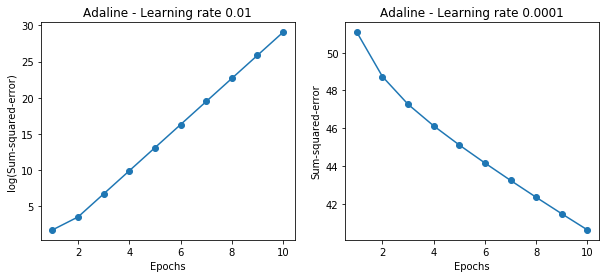

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

## Function for printing decision regions

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Standarizing, classifying and plotting the samples
- The normalization procedure helps gradient descent learning to converge more quickly
- One of the reasons it helps is because the optimizer has to go through fewer steps to find a good or optimal solution (global cost minimum)

net_input:
- The resulting classifier prediction values for all input samples BEFORE applying any of the thresholding functions
[ 2.51557220e-02  2.70720066e-02  2.93547454e-02  2.95799793e-02
  2.61138643e-02  2.11819325e-02  2.99464335e-02  2.57474101e-02
  3.18627181e-02  2.67055524e-02  2.19148409e-02  2.72972405e-02
  2.80301489e-02  3.39202230e-02  1.91816343e-02  1.90404140e-02
  2.26477493e-02  2.51557220e-02  1.83075056e-02  2.47892678e-02
  2.11819325e-02  2.47892678e-02  3.14122503e-02  2.40563594e-02
  2.61978779e-02  2.53809559e-02  2.53809559e-02  2.38311255e-02
  2.41975797e-02  2.82553828e-02  2.72972405e-02  2.19148409e-02
  2.38311255e-02  2.13231528e-02  2.67055524e-02  2.68467727e-02
  2.16896070e-02  2.67055524e-02  3.22291723e-02  2.47892678e-02
  2.64803185e-02  3.12710300e-02  3.22291723e-02  2.53809559e-02
  2.33234510e-02  2.80301489e-02  2.44228136e-02  2.99464335e-02
  2.28729832e-02  2.61138643e-02 -5.14197037e-03  1.33979184e-03
 -4.91673647e-03  1.1795343

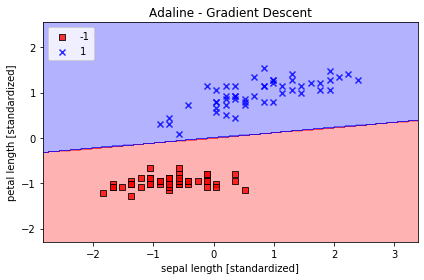

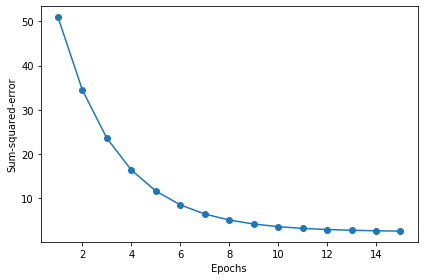

In [6]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y, show_interm_structures=True)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# 3. Adaline with stochastic gradient descent
- The main difference is that now we update weight after each sample instead of calculating the changes based on the whole training dataset (less efficient, but allows to see the progress sooner)
- This approach also allows for online learning with new-coming data

In [7]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# 4. Testing stochastic gradient descent approach

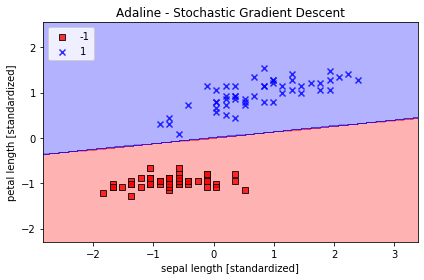

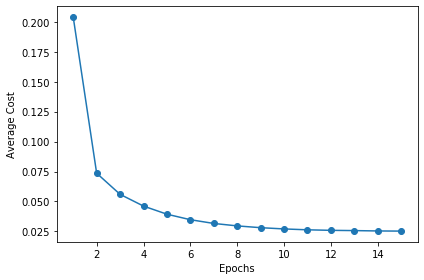

In [8]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()